In [41]:
import os
os.chdir('/home/hugo-dev/esirem-dev/4a/kmutt/kmutt_v2')

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from utils.load_data import load_data_with_mapping

In [43]:
DATA_PATH = "./data/data_2s_6mfcc_RMT-HRK.json"

In [44]:
X, y, mapping = load_data_with_mapping(DATA_PATH)

print(X.shape)
print(y.shape)

Training sets loaded!
(2458, 101, 6)
(2458,)


In [45]:
# plot Total Segments for each class
def plot_segments(y, mapping):
    plt.figure(figsize=(10, 5))
    values, counts = np.unique(y, return_counts=True)
    plt.bar([mapping[val] for val in values], counts)
    plt.xlabel('Classes')
    plt.ylabel('Total Segments')
    plt.title('Total Segments for each class')

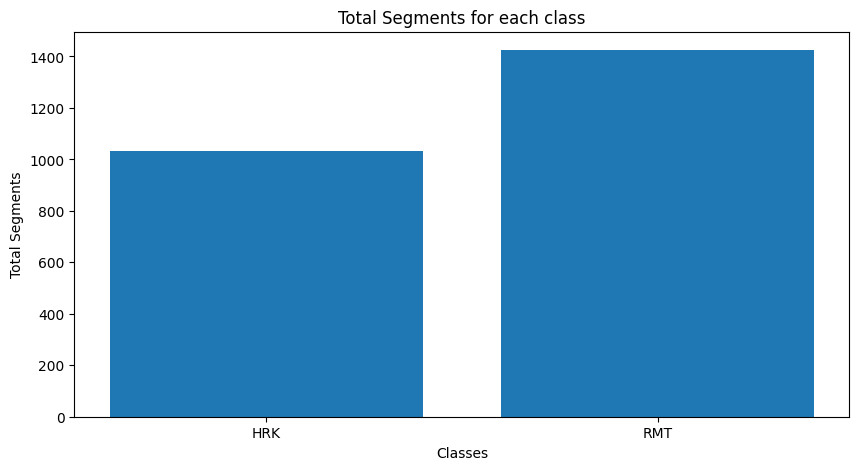

In [46]:
plot_segments(y, mapping)

In [47]:
# plot the PCA
def plot_pca(X, y, mapping):
    X_reshaped = X.reshape(X.shape[0], -1)
    plt.figure(figsize=(8,6))

    for cls in range(len(mapping)):
        cls_data = X_reshaped[y == cls]

        pca = PCA(n_components=2)
        data_pca = pca.fit_transform(cls_data)

        plt.scatter(data_pca[:,0], data_pca[:,1], alpha=0.5, label=mapping[cls])

    plt.xlabel('First componant')
    plt.ylabel('Second componant')
    plt.legend()

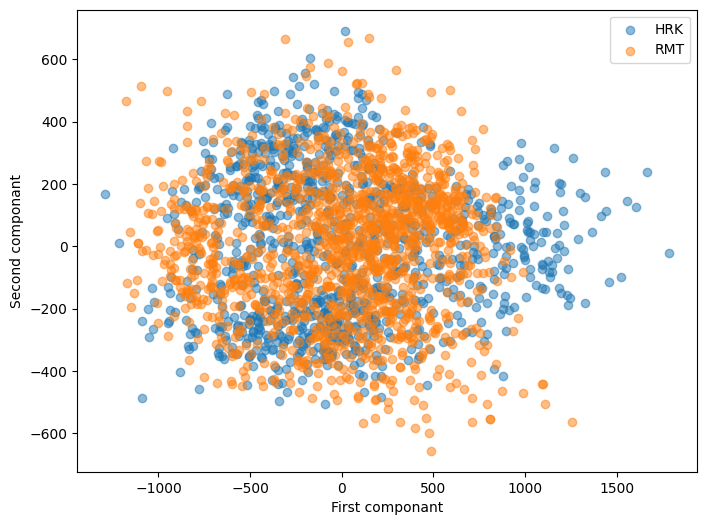

In [48]:
plot_pca(X, y, mapping)